In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import model_selection, metrics, datasets, preprocessing
import matplotlib.pyplot as plt
from matplotlib import colors, patches
from IPython.core.interactiveshell import InteractiveShell


In [2]:
# 配置项
%config IPCompleter.greedy=True

# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [11]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(10)
df.info()
np.unique(df.target)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


array([0, 1, 2])

In [39]:
np.set_printoptions(precision=4)
mean_vectors = []
# 每一类 在每一个维度上均值
for i in range(3):
    mean_vectors.append(df.loc[df.target == i, df.columns[:-1]].mean(axis=0).values)
    print('Mean Vector class %s: %s\n' %(i, mean_vectors[i]))


Mean Vector class 0: [5.006 3.428 1.462 0.246]

Mean Vector class 1: [5.936 2.77  4.26  1.326]

Mean Vector class 2: [6.588 2.974 5.552 2.026]



In [ ]:
# -  <img src="img/5.png" alt="FAO" width="330" >

### 计算两个 4×4 维矩阵：类内散布矩阵和类间散布矩阵
![avatar](img/5.png)


In [41]:
S_W = np.zeros((4, 4))
for i, mv in zip(range(3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in df.loc[df.target == i, df.columns[:-1]].values:
        # 转化为列向量
        row, mv = row.reshape(4, 1), mv.reshape(4, 1)
        class_sc_mat += np.dot((row - mv), (row - mv).T)
    S_W += class_sc_mat
S_W

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

-  <img src="img/6.png" alt="FAO" width="430" >

In [45]:
S_B = np.zeros((4, 4))
# 计算每个特征的均值
overall_mean = np.mean(df.loc[:, df.columns[:-1]], axis=0).values
for i, mv in zip(range(3), mean_vectors):
    num = len(df.loc[df.target == i, df.columns[:-1]])
    overall_mean_, mv_ = overall_mean.reshape(4, 1), mv.reshape(4, 1)
    S_B += num * np.dot((mv_ - overall_mean_), (mv_ - overall_mean_).T)

S_B

array([[ 63.2121, -19.9527, 165.2484,  71.2793],
       [-19.9527,  11.3449, -57.2396, -22.9327],
       [165.2484, -57.2396, 437.1028, 186.774 ],
       [ 71.2793, -22.9327, 186.774 ,  80.4133]])

-  <img src="img/7.png" alt="FAO" width="230" >

In [61]:
# eig_vals 为特征值 eig_vecs为特征向量
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
# eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eig_vals
eig_vecs
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

array([ 3.2192e+01+0.000e+00j,  2.8539e-01+0.000e+00j,
       -2.8907e-15+2.366e-15j, -2.8907e-15-2.366e-15j])

array([[-0.2087+0.j    , -0.0065+0.j    , -0.1416+0.5257j,
        -0.1416-0.5257j],
       [-0.3862+0.j    , -0.5866+0.j    , -0.2125-0.2304j,
        -0.2125+0.2304j],
       [ 0.554 +0.j    ,  0.2526+0.j    , -0.2703-0.2289j,
        -0.2703+0.2289j],
       [ 0.7074+0.j    , -0.7695+0.j    ,  0.6927+0.j    ,
         0.6927-0.j    ]])


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 3: -2.89e-15

Eigenvector 4: 
[[-0.1416]
 [-0.2125]
 [-0.2703]
 [ 0.6927]]
Eigenvalue 4: -2.89e-15


### 特征值与特征向量：
- 特征向量：表示映射方向
- 特征值：特征向量的重要程度

In [67]:
# 特征值, 特征向量
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])  for i in range(len(eig_vals))]
# 按照元祖第一个值 从大到小排序
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

eig_pairs

[(32.191929198278025,
  array([-0.2087+0.j, -0.3862+0.j,  0.554 +0.j,  0.7074+0.j])),
 (0.28539104262306647,
  array([-0.0065+0.j, -0.5866+0.j,  0.2526+0.j, -0.7695+0.j])),
 (3.7355530009793716e-15,
  array([-0.1416+0.5257j, -0.2125-0.2304j, -0.2703-0.2289j,  0.6927+0.j    ])),
 (3.7355530009793716e-15,
  array([-0.1416-0.5257j, -0.2125+0.2304j, -0.2703+0.2289j,  0.6927-0.j    ]))]

In [56]:
# 可解释性方差 查看每个特征值占比
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [73]:
# 因为前列特征几乎涵盖了所有的特征 所以取前两维
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


In [74]:
X_lda = np.dot(df.iloc[:, :-1].values, W)
X_lda

array([[-1.4992, -1.8868],
       [-1.2644, -1.5921],
       [-1.3553, -1.7334],
       [-1.185 , -1.6236],
       [-1.517 , -1.9448],
       [-1.4086, -2.2015],
       [-1.2855, -1.9018],
       [-1.3843, -1.8022],
       [-1.1214, -1.5302],
       [-1.3183, -1.5486],
       [-1.5837, -1.9808],
       [-1.2872, -1.7756],
       [-1.3142, -1.5145],
       [-1.3761, -1.587 ],
       [-1.9492, -2.2351],
       [-1.7752, -2.5473],
       [-1.6302, -2.3025],
       [-1.4285, -1.9637],
       [-1.5034, -2.0678],
       [-1.4889, -2.1144],
       [-1.357 , -1.7543],
       [-1.3796, -2.1327],
       [-1.6551, -2.0432],
       [-1.0436, -1.9245],
       [-1.121 , -1.6999],
       [-1.1744, -1.5423],
       [-1.1874, -1.9308],
       [-1.4647, -1.8622],
       [-1.4815, -1.8287],
       [-1.189 , -1.6576],
       [-1.1713, -1.5996],
       [-1.3263, -1.9587],
       [-1.7671, -2.1372],
       [-1.853 , -2.3   ],
       [-1.2476, -1.6255],
       [-1.4733, -1.7606],
       [-1.6381, -1.9146],
 

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


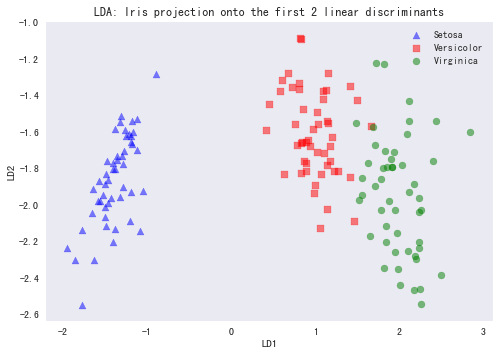

In [76]:
from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[df.target == label],
                y=X_lda[:,1].real[df.target == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
plot_step_lda()

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(df.iloc[:, :-1], df.target)

In [81]:
def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][df.target == label],
                    y=X[:,1][df.target == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


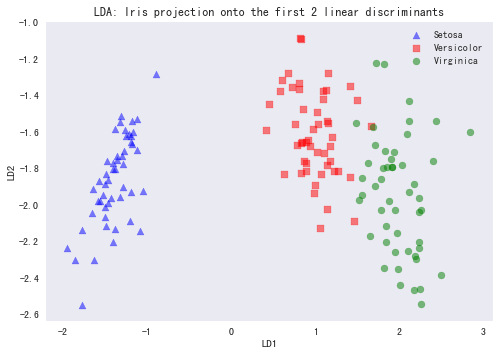

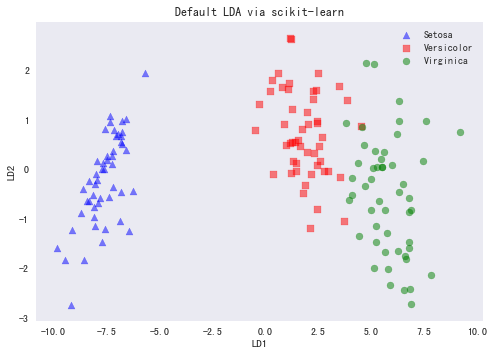

In [82]:
plot_step_lda()
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')